<a href="https://colab.research.google.com/github/tanriders/Agriculture-Crop-Yield-Prediction/blob/main/DS_Agriculture_Crop_Yield_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import Libraries**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import plotly.express as px

In [ ]:
class colorss:
    yellows=['#ffffd4','#fee391','#fec44f','#fe9929','#d95f0e','#993404','#a70000','#ff5252','#ff7b7b','#ffbaba']
    greens=['#ffffd4','#fee391','#fec44f','#fe9929','#d9f0a3','#addd8e','#78c679','#41ab5d','#238443','#005a32']
cmaps=['flare','icefire','bwr_r','Accent','Spectral','RdGy','afmhot_r','afmhot','inferno','seismic','vlag','vlag_r']

#**Import Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DS/DS-Agriculture/Dataset/yield_df.csv")
df

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


**Area:**	ชื่อประเทศที่ปลูกพืชผล

**Item:**	ชนิดของพืชที่ปลูก

**Year:**	เวลาที่ปลูกพืชในปี พ.ศ. 2533-2556

**average_rain_fall_mm_per_year:**	ปริมาณฝนตกเฉลี่ยต่อปี

**pesticides_tonnes:**	สารกำจัดศัตรูพืชที่ใช้ในหน่วยตัน

**avg_temp:**	อุณหภูมิเฉลี่ย

**hg/ha_yield:**	พืชให้ผลผลิตมูลค่าเป็นเฮกโตกรัมต่อเฮกตาร์ (Hg/Ha)

# **Exploratory Data Analysis**

**Dataset Basic Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


**Summary Statistics for Numerical Variables**

In [ ]:
df.describe()

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


Average_rain_fall_mm_per_year: ปริมาณน้ำฝนเฉลี่ยต่อปีอยู่ที่ประมาณ 1,149 โดยมีปริมาณฝนน้อยที่สุดคือ 51 และมากที่สุด 3,240

pesticides_tonnes: ค่าเฉลี่ยของสารกำจัดศัตรูพืชที่ใช้ในหน่วยตันคือมากถึง 37,077 ตัน โดยมีขั้นต่ำเพียง 0.04 และสูงสุดมากถึง 367,778 ตัน

hg/ha_yield: ผลผลิตพืชผลโดยเฉลี่ยคือ 77053.3 ตั้งแต่ 50 ไปจนถึง 501,412 เฮกโตกรัมต่อเฮกตาร์

**Summary Statistics for Categorical Variables**

In [ ]:
df.describe(include='object')

,Area,Item
count,28242,28242
unique,101,10
top,India,Potatoes
freq,4048,4276


**Area:** มี 101 ประเทศ/พื้นที่ที่ไม่ซ้ำกัน โดยอินเดียเป็นหมวดหมู่ที่พบบ่อยที่สุด ซึ่งเกิดขึ้น 4,048 ครั้งจากทั้งหมด 28,242

**Item:** มีพืชผลที่ไม่ซ้ำกัน 10 ชนิด ประเภทที่พบบ่อยที่สุดคือ "มันฝรั่ง" เกิดขึ้น 4276 ครั้ง

จัดข้อมูลโดย ลบ Column 'Unnamed: 0' ออก

In [ ]:
df.drop("Unnamed: 0", axis=1,inplace=True)
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


ลบประเทศที่มีการบันทึกน้อยกว่า 100 รายการ

In [ ]:
# remove countries with less than 100 record
country_counts =df['Area'].value_counts()
countries_to_drop = country_counts[country_counts < 100].index.tolist()
df_filtered = df[~df['Area'].isin(countries_to_drop)]
df = df_filtered.reset_index(drop=True)

df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Algeria,Maize,1990,16500,89.0,1828.92,17.48
1,Algeria,Potatoes,1990,78936,89.0,1828.92,17.48
2,Algeria,"Rice, paddy",1990,28000,89.0,1828.92,17.48
3,Algeria,Sorghum,1990,16571,89.0,1828.92,17.48
4,Algeria,Wheat,1990,6315,89.0,1828.92,17.48
...,...,...,...,...,...,...,...
26292,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
26293,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
26294,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
26295,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [ ]:
datacorr=df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = datacorr.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
for column in categorical_columns:
    datacorr[column] = label_encoder.fit_transform(datacorr[column])

<Axes: >

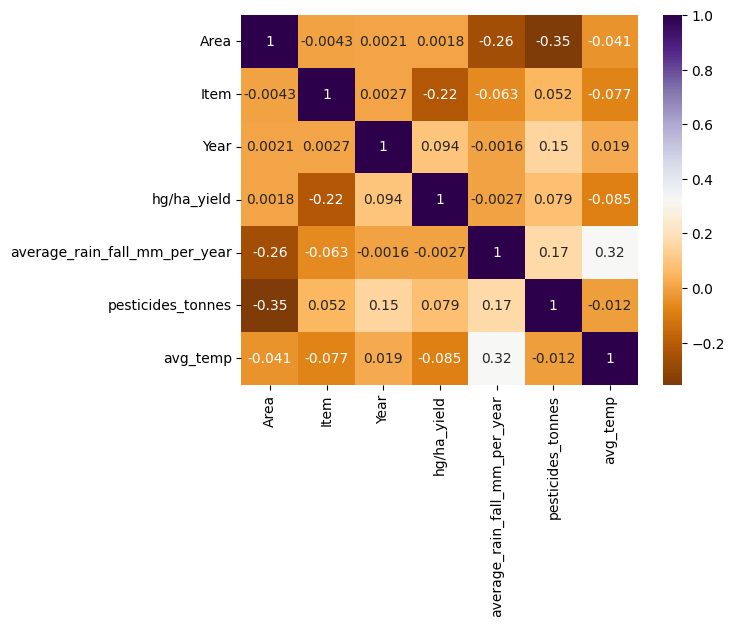

In [ ]:
sns.heatmap(datacorr.corr() , annot= True , cmap='PuOr')

**Area**: มีความสัมพันธ์กันอย่างมากระหว่าง **Area** กับ **pesticides_tonnes** พร้อมด้วย **Area** และ **average rainfall**

**Item**: มีความสัมพันธ์กันอย่างมากระหว่าง **Item** กับ **hg/ha_yield**

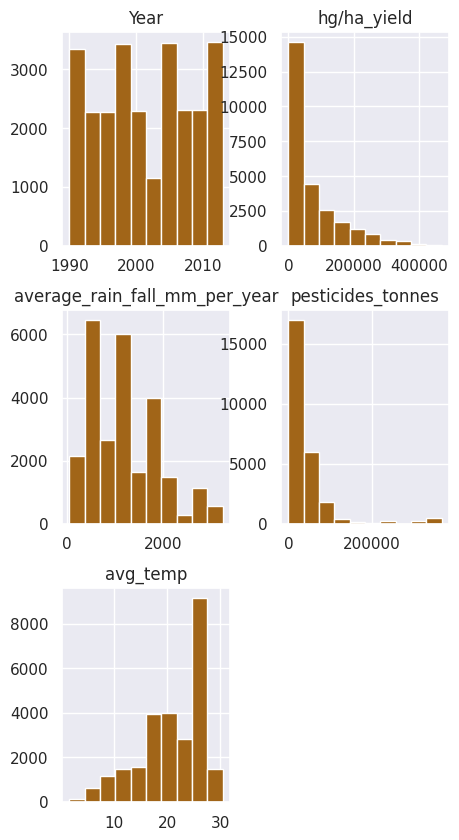

In [ ]:
sns.set(palette='BrBG')
df.hist(figsize=(5,10));

**rainfall**: ปริมาณน้ำฝนส่วนใหญ่อยู่ระหว่าง **0-1,000** และประมาณ **3,000** น้อยมาก

**pesticides_tonnes**: สารกำจัดศัตรูพืชที่ใช้แล้วส่วนใหญ่มีค่าเพียงเล็กน้อยถึงศูนย์

**avg_temp**: อุณหภูมิเฉลี่ยส่วนใหญ่อยู่ที่ประมาณ 25

**hg/ha yield**: มีผลผลิตส่วนใหญ่ประมาณ 0

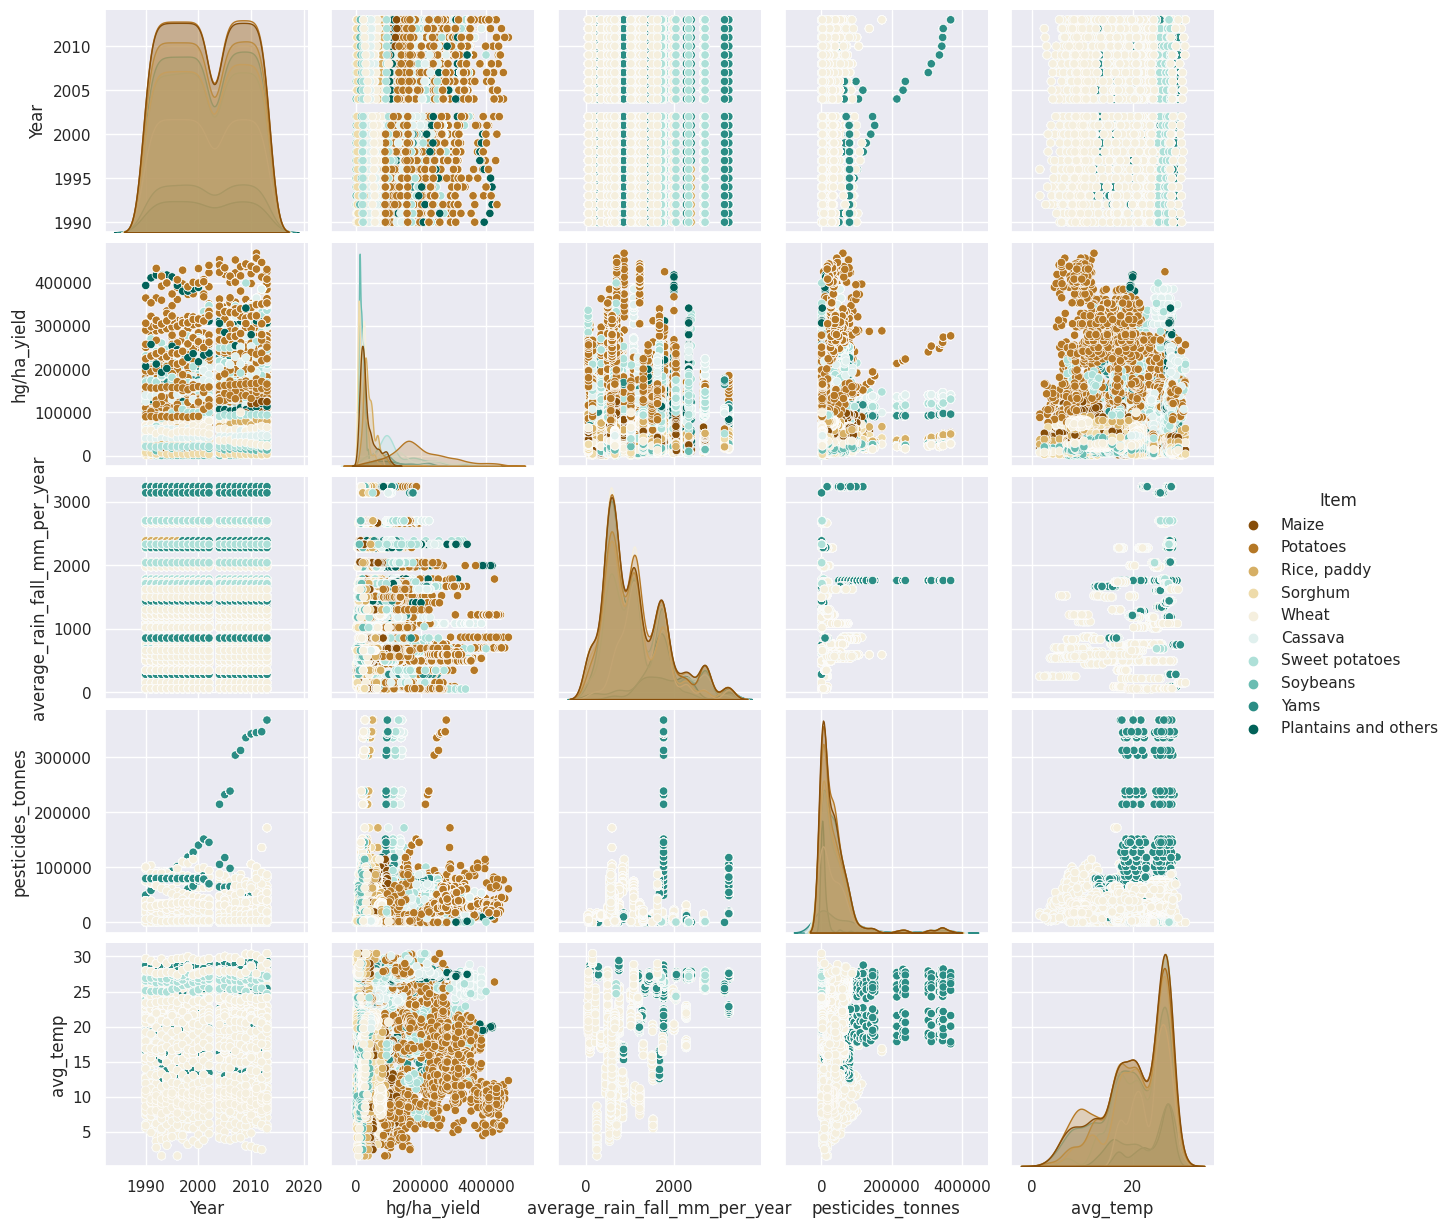

In [ ]:
sns.pairplot(data=df,hue='Item',kind='scatter',palette='BrBG')

<Axes: xlabel='Year'>

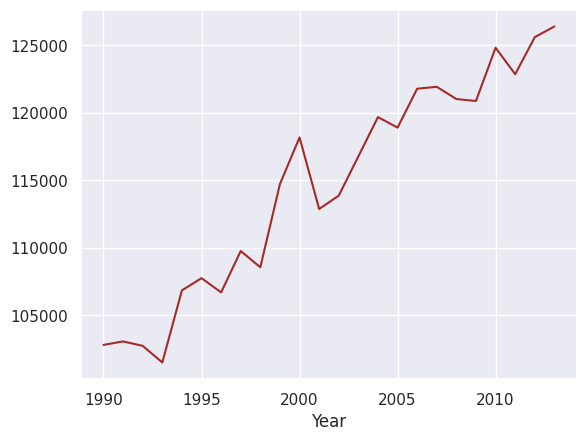

In [ ]:
df2=df[df['Item']=='Yams']
df2.groupby('Year')['hg/ha_yield'].mean().plot(color='brown')

**Items:**
* **yams:** It appears that yams uses a lot of pesticides, grow on all rainfall ranges.
* **wheat:** Wheat thrives on all average temperature ranges and grows on average to no rainfall.

**year:**

* **2003-2013:** Starting from 2003 to 2013, more and more pesticides were used on yams to increase its productivity.

**hg/ha_yield:** Sorghum and Soybeans are lowest in yield production while potatoes are most popular.

In [ ]:
geojson_url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
data = gpd.read_file(geojson_url)

merged_data = data.merge(df, left_on='NAME', right_on='Area', how='left')

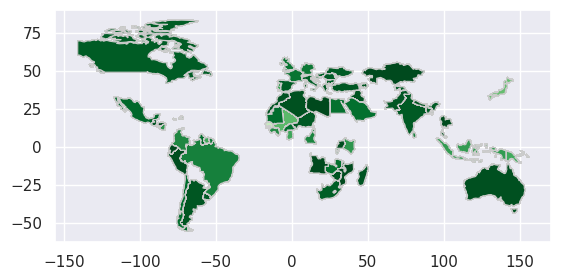

In [ ]:
# fig, ax = plt.subplots(figsize=(15, 10))
merged_data.plot( column='hg/ha_yield', cmap='Greens_r', linewidth=0.8, edgecolor='0.8')
# plt.title("Countries")
plt.show()

In [ ]:
del merged_data

In [ ]:
del data

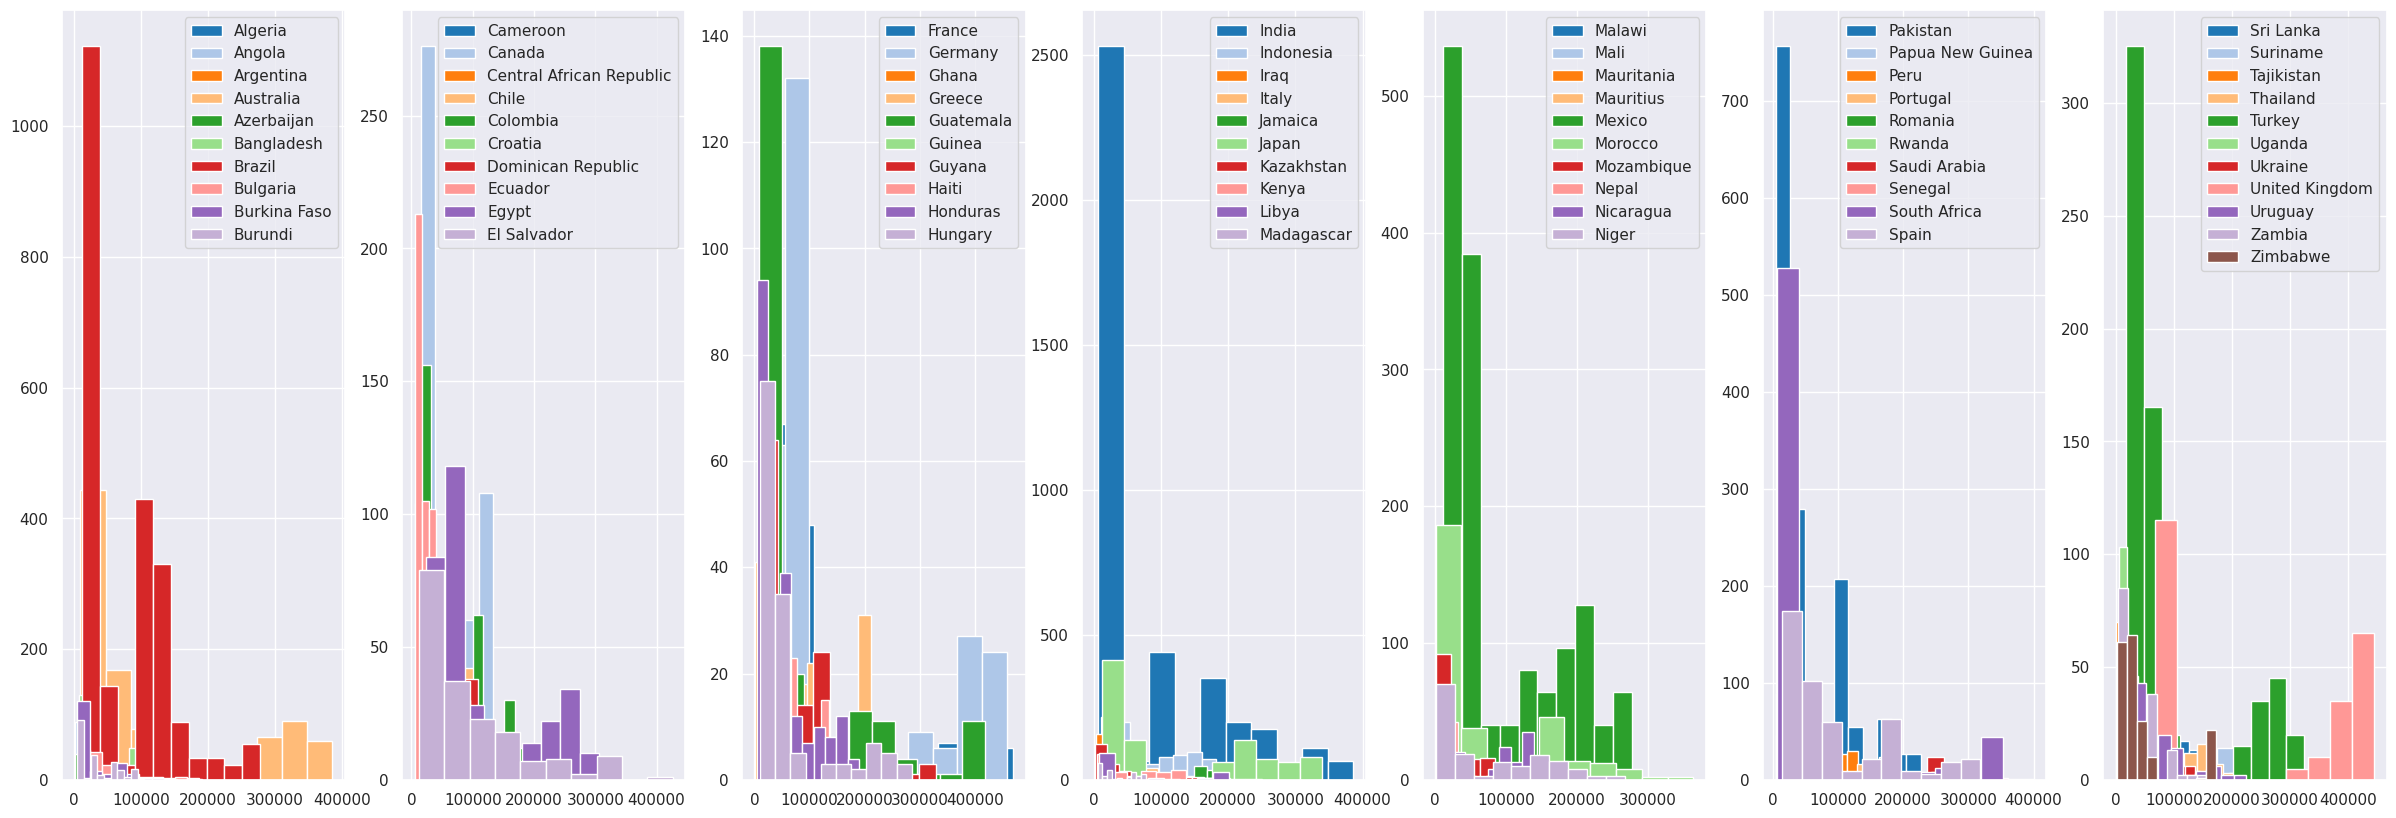

In [ ]:
palette = sns.color_palette('tab20', 21,as_cmap=True)
num_plots = 7
areas_per_plot = 10

# Get unique areas
unique_areas = sorted(df['Area'].unique())

# Split into chunks
area_chunks = [unique_areas[i:i+areas_per_plot] for i in range(0, len(unique_areas), areas_per_plot)]
area_chunks[-2] = unique_areas[-11:]
fig, axs = plt.subplots(ncols=num_plots, figsize=(30, 10))
j=0
for i, ax in enumerate(axs):

    plot_df = df[df['Area'].isin(area_chunks[i])]
    for i, area in enumerate(plot_df['Area'].unique()):
       data = plot_df[plot_df['Area'] == area]
       ax.hist(data['hg/ha_yield'], facecolor=palette(i), label=area)

    ax.legend()
    j+=1

plt.show()

In [ ]:
for i in range(0,7):
    plot_df = df[df['Area'].isin(area_chunks[i])]
    dk=plot_df.groupby(['Area','Item'])['hg/ha_yield'].mean().to_frame()
    dg=dk.sort_values(by=['hg/ha_yield'],ascending=True)
    display(dg.head())

hg/ha_yield
Area       Item                 
Angola     Sorghum   2926.769231
Azerbaijan Sorghum   3324.166667
Angola     Soybeans  4235.538462
           Maize     5753.869565
Azerbaijan Soybeans  7599.850000

hg/ha_yield
Area                     Item                  
Ecuador                  Wheat      7111.956522
Cameroon                 Soybeans   7566.782609
Central African Republic Sorghum    9353.913043
                         Maize     10250.869565
Cameroon                 Sorghum   11521.304348

hg/ha_yield
Area     Item                 
Honduras Wheat     5574.130435
Haiti    Maize     7905.565217
         Sorghum   8157.913043
Ghana    Sorghum  10291.347826
Honduras Sorghum  10863.782609

hg/ha_yield
Area       Item                 
Madagascar Soybeans  6267.173913
           Sorghum   6452.304348
Kenya      Sorghum   7744.478261
India      Sorghum   8452.434783
Libya      Wheat     8459.521739

,,hg/ha_yield
Area,Item,
Niger,Sorghum,2592.913043
Mauritania,Sorghum,4673.869565
Mozambique,Sorghum,4830.304348
Malawi,Sorghum,6403.086957
Morocco,Sorghum,6594.739130


,,hg/ha_yield
Area,Item,
Pakistan,Sorghum,6056.043478
Rwanda,Soybeans,6664.869565
Senegal,Sorghum,8159.173913
Pakistan,Soybeans,9276.000000
Rwanda,Sorghum,10969.478261


,,hg/ha_yield
Area,Item,
Tajikistan,Soybeans,941.750000
Zimbabwe,Sorghum,3864.956522
Zambia,Sorghum,6809.608696
Thailand,Wheat,7547.000000
Suriname,Soybeans,9039.869565


In [ ]:
for i in range(0,7):
    plot_df = df[df['Area'].isin(area_chunks[i])]
    dk=plot_df.groupby(['Area','Item'])['hg/ha_yield'].mean().to_frame()
    dg=dk.sort_values(by=['hg/ha_yield'],ascending=False)
    display(dg.head())

,,hg/ha_yield
Area,Item,
Australia,Potatoes,330944.826087
Argentina,Potatoes,262059.173913
Australia,Sweet potatoes,257610.826087
Brazil,Potatoes,196056.000000
Algeria,Potatoes,182413.956522


hg/ha_yield
Area        Item                               
Egypt       Sweet potatoes        261369.347826
            Potatoes              235444.956522
El Salvador Potatoes              211362.304348
            Plantains and others  198605.217391
Chile       Potatoes              184835.260870

hg/ha_yield
Area      Item                               
France    Potatoes              395037.260870
Germany   Potatoes              386553.347826
Guatemala Plantains and others  291096.304348
          Potatoes              241157.869565
Hungary   Potatoes              210372.782609

hg/ha_yield
Area  Item                         
Japan Potatoes        311005.260870
India Cassava         282234.434783
Italy Potatoes        237861.347826
Japan Sweet potatoes  237639.391304
      Yams            211343.434783

,,hg/ha_yield
Area,Item,
Mexico,Potatoes,228553.695652
Morocco,Potatoes,217065.695652
Mauritius,Potatoes,211356.869565
Mali,Potatoes,195653.869565
Mexico,Sweet potatoes,194611.913043


,,hg/ha_yield
Area,Item,
South Africa,Potatoes,297195.434783
Spain,Potatoes,251421.695652
Saudi Arabia,Potatoes,223336.652174
Senegal,Potatoes,180499.608696
Papua New Guinea,Yams,172521.173913


hg/ha_yield
Area           Item                               
United Kingdom Potatoes              406131.695652
Turkey         Potatoes              265486.565217
Suriname       Plantains and others  253966.913043
               Cassava               191282.478261
Tajikistan     Potatoes              176549.190476

In [ ]:
dk=df.groupby(['Area','Item'])['hg/ha_yield'].mean().to_frame()
dk.sort_values(by=['hg/ha_yield'],ascending=False)

,,hg/ha_yield
Area,Item,
United Kingdom,Potatoes,406131.695652
France,Potatoes,395037.260870
Germany,Potatoes,386553.347826
Australia,Potatoes,330944.826087
Japan,Potatoes,311005.260870
...,...,...
Zimbabwe,Sorghum,3864.956522
Azerbaijan,Sorghum,3324.166667
Angola,Sorghum,2926.769231


**Group 0:** **Australia** produced the largest amount of yield harvesting **potatoes** while **Angola** has the least yield harvesting **sorghum,soybeans and maize**.

**Group 1:** **Egypt** was producing most yield in this group growing **sweet potatoes and potatoes** while **Ecuador** was struggling in harvesting **wheat**.

**Group 2:** **France and Germany** are at the top of yield production both harvesting **potatoes** while **Honduras** wasn't in luck harvesting **wheat**

**Group 3:** India soared in growing Cassava and Japan was at the top growing potatoes while Madagascar struggled to grow soybeans and sorghum.

**Group 4:** Morocco and Mexico shined in yield production of potatoes while Niger failed to have high productions of wheat

**Group 5:** Pakistan was struggling in growing sorghum while South Africa Spain, and Saudi Arabia shined in growing Potatoes

**Group 6:** Tajikistan failed to harvest large amounts of soybeans while United Kingdom and Turkey produced a myriad of potatoes Collectively:

* Top producing countries: United Kingdom, France, Germany, Australia, and Japan
* Top produced Item: potatoes
* Least producing countries: Zimbabwe, Azerbaijan, Angola, Niger, Tajikistan
* Least produced item: sorghum and soybeans

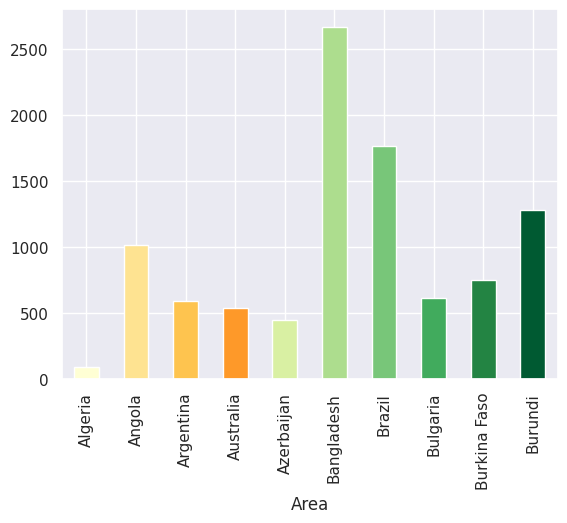

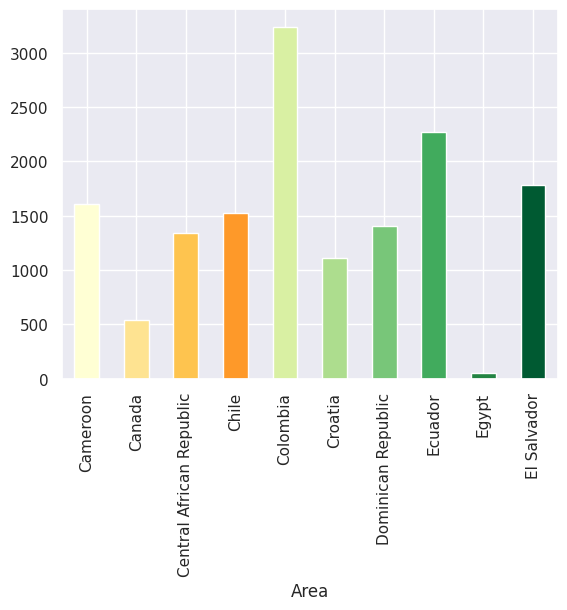

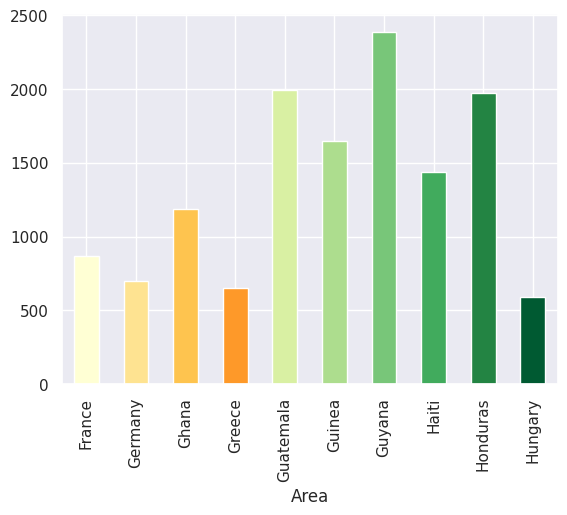

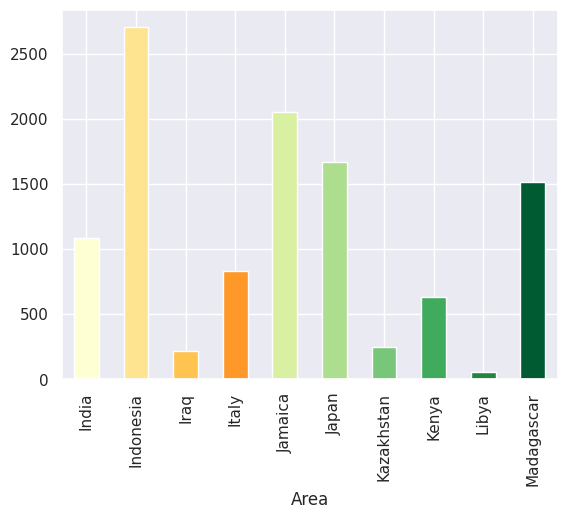

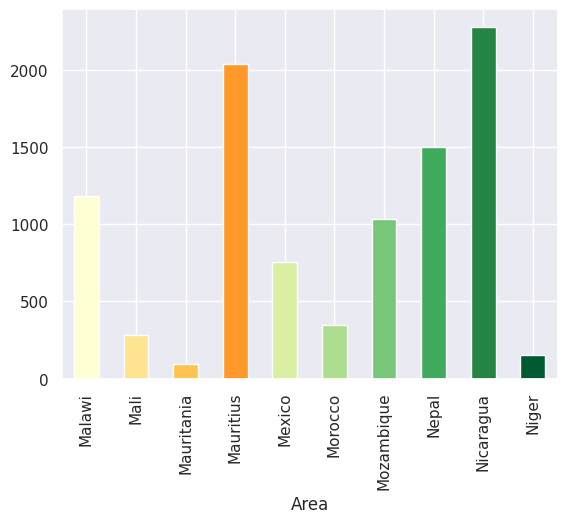

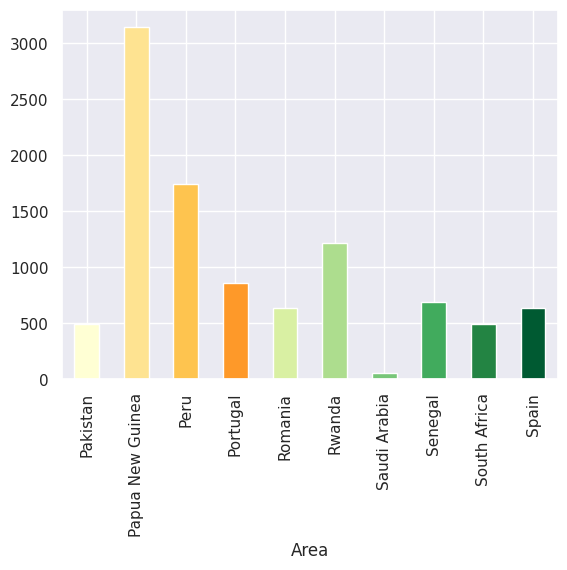

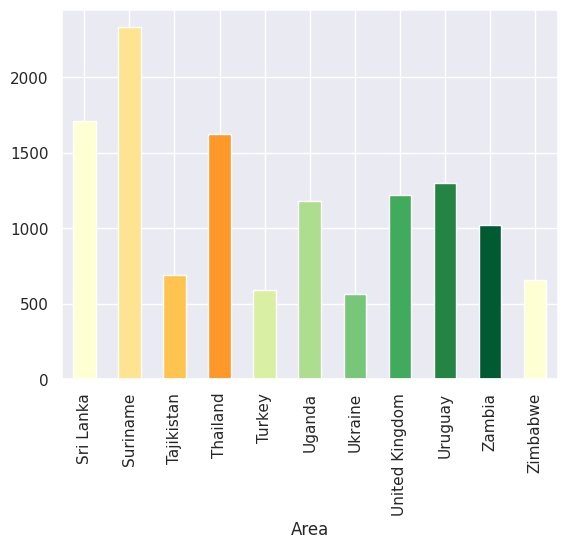

In [ ]:
for i in range(0,7):
    plot_df = df[df['Area'].isin(area_chunks[i])]
    plot_df.groupby(['Area'])['average_rain_fall_mm_per_year'].mean().plot(kind='bar',rot=0,color=colorss.greens)
    plt.xticks(rotation=90)
    plt.show()

* **Top** rainfall countries: Bangladesh, Colombia, Guyana, Indonesia, Nicaragua, Papua New Guinea, Ecuador, and Suriname have rainfall with over 2000 mm

* **Least** rainfall countries: Saudi Arabia, Pakistan, South Africa, Mali, Mauritania, Morocco, Niger, Libya, Iraq, Egypt, Azerbaijan,and Algeria have rainfall with less than 500 mm

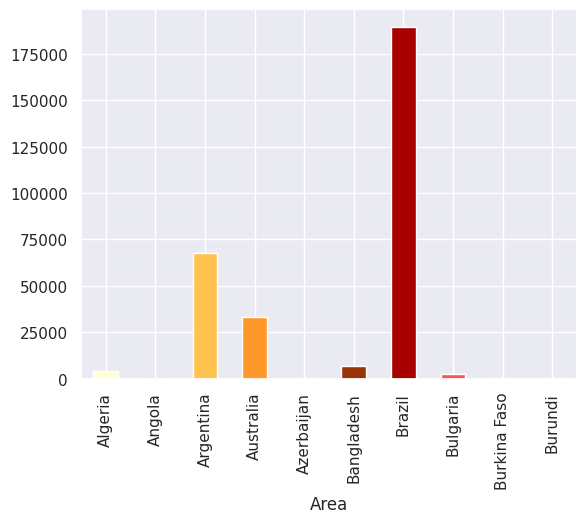

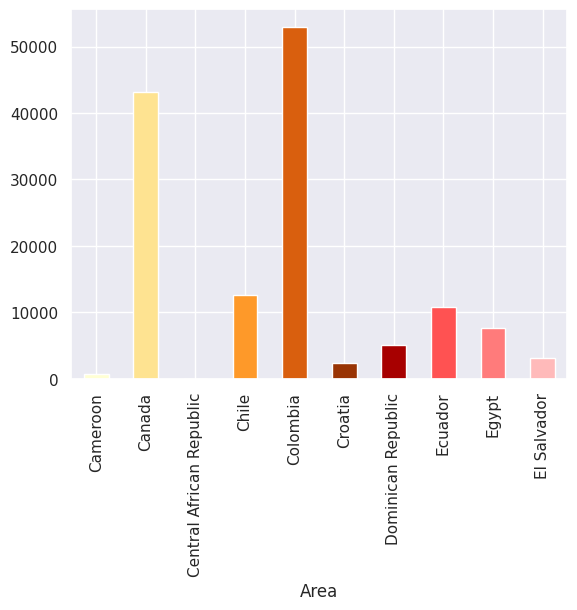

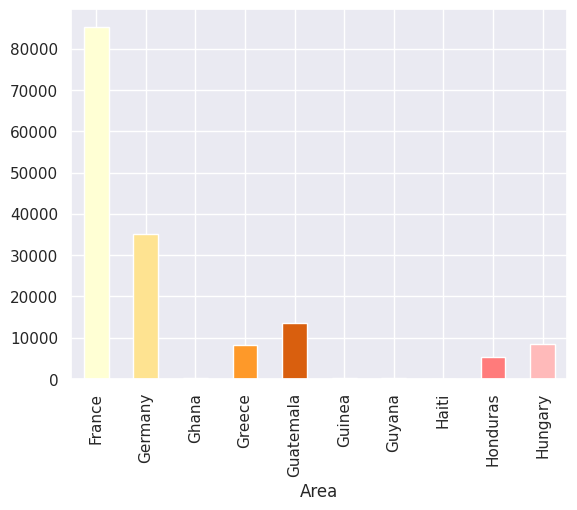

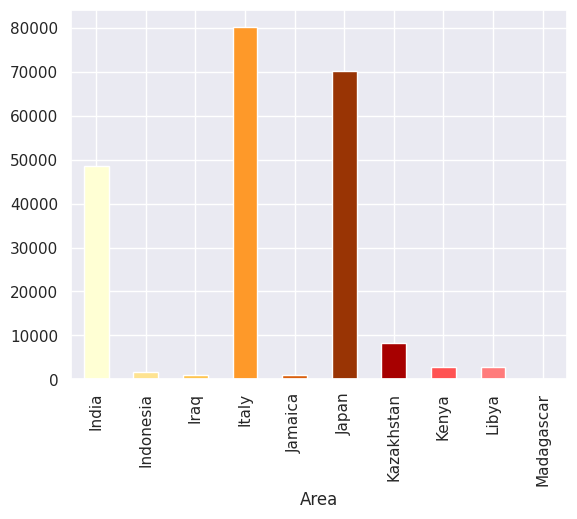

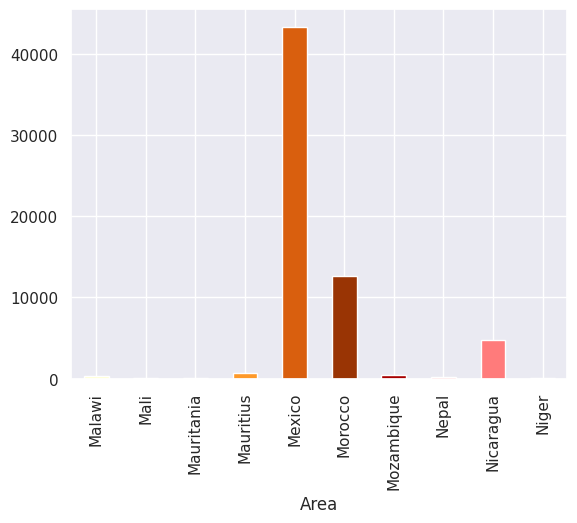

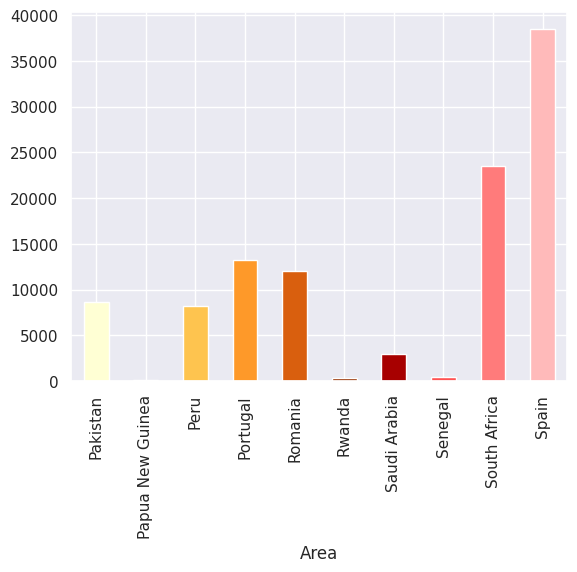

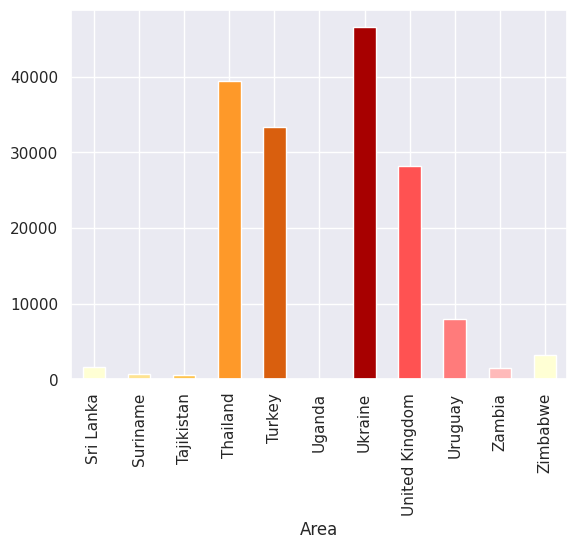

In [ ]:
for i in range(0,7):
    plot_df = df[df['Area'].isin(area_chunks[i])]
    plot_df.groupby(['Area'])['pesticides_tonnes'].mean().plot(kind='bar',rot=0,color=colorss.yellows)
    plt.xticks(rotation=90)
    plt.show()

**Top** pesticides using countries: Brazil, Italy, Argentina

* **France:** For a high yield producing country, using over 80000 tonnes of pesticides could be harmful.

 * **Japan:** Another high producing country using over 60000 tonnes of pesticides.

**Least** pesticides using countries: Algeria, Angola, Azerbaijan, Bulgaria, Burkina Faso, Burundi, Cameroon, Cenrral African Republic, Croatia, Egypt, El Salvador,Greece, Guinea, Guyana, Haiti, Honduras, Hungary, Indonesia, Iraq, Jamaica, Kenya, Kazakhstan, Libya, Madagascar, Malawi, Mali, Mauritana, Mauritius, Mozambique, Nepal, Niger, Papua New Guinea, Rwanda, Senegal, Saudi Arabia, Sri Lanka, Suriname, Tajikistan, Uganda, Zambia, Zimbabwe, Uruguay have been using pesticides with less than 10000 tonnes

* All poorly producing yield countries are included in least pesticides usage countries

**Germany, Australia, and United Kingdom** are top producing countries and they use an average amount of pesticides around 30000 tonnes

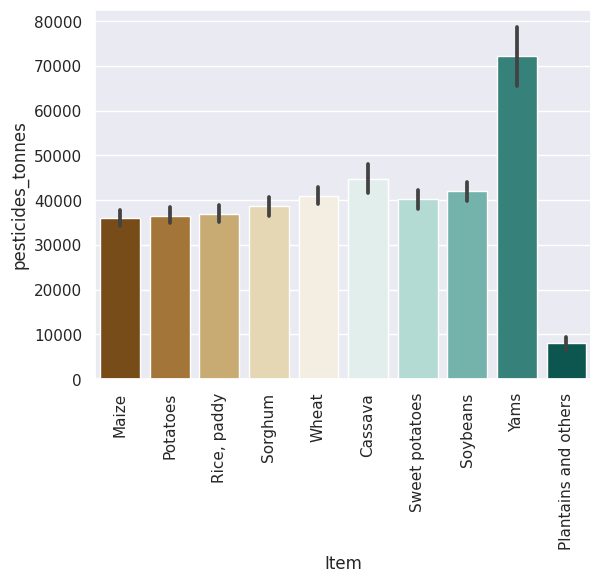

In [ ]:
sns.barplot(data=df, x = df.Item, y = df['pesticides_tonnes'],palette='BrBG')
plt.xticks(rotation=90)
plt.show()

**Top** pesticides used on items: Yams

**Least** pesticides used on items: Plantains and others

<Axes: xlabel='Item', ylabel='hg/ha_yield'>

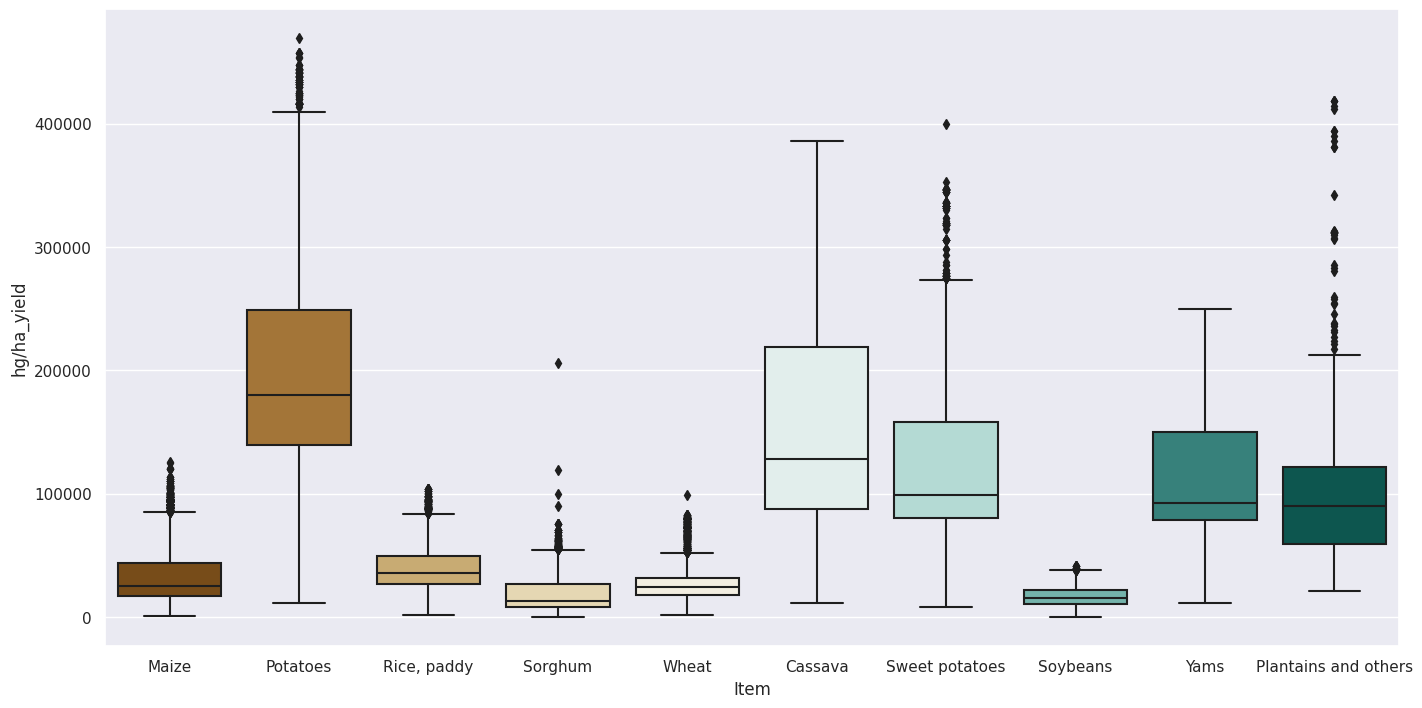

In [ ]:
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="Item",y="hg/ha_yield",palette="BrBG",data=df,ax=ax)

**Top** producing items: potatoes, cassava

**Least** producing items: soybeans, sorghum, wheat, maize, and rice, paddy

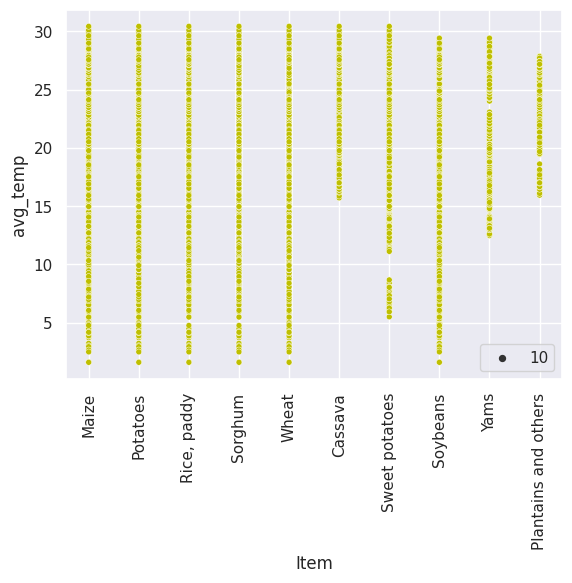

In [ ]:
sns.scatterplot(x = 'Item', y = 'avg_temp', data = df,size=10,color='y')
plt.xticks(rotation=90);

**Cassava, Yams, and Plantains and others** need more than 15 avg temperature to grow

**all** other items can grow at any temperature range

In [ ]:
grouped = df.groupby('Item')

best_areas = []

for item, group in grouped:
    max_production_row = group[group['hg/ha_yield'] == group['hg/ha_yield'].max()]

    area = max_production_row['Area'].values[0]
    production = max_production_row['hg/ha_yield'].values[0]

    best_areas.append({'Item': item, 'Area': area, 'hg/ha_yield': production})

best_areas_df = pd.DataFrame(best_areas)

best_areas_df

,Item,Area,hg/ha_yield
0,Cassava,India,385818
1,Maize,Tajikistan,125670
2,Plantains and others,Guatemala,418505
3,Potatoes,France,468991
4,"Rice, paddy",Australia,103895
5,Sorghum,Algeria,206000
6,Soybeans,Turkey,41609
7,Sweet potatoes,Senegal,400000
8,Wheat,Zambia,99387
9,Yams,Mali,250000


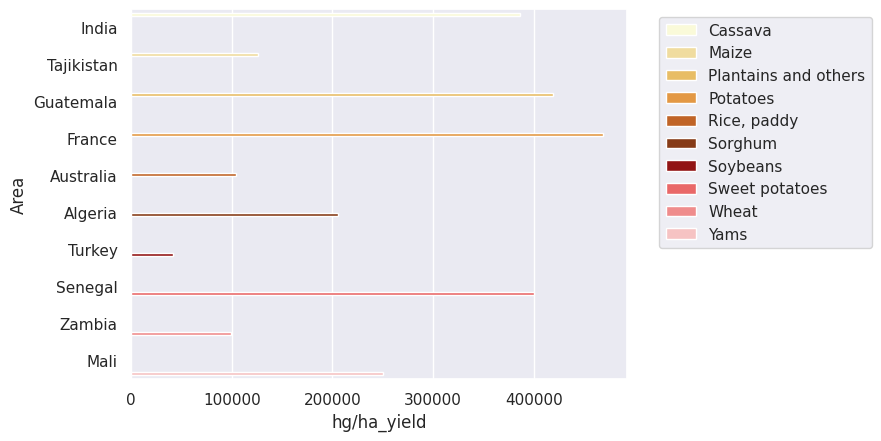

In [ ]:
ax=sns.barplot(data=best_areas_df,x='hg/ha_yield',y='Area',hue='Item',palette=colorss.yellows)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Cassava:** India is the top at producing Cassava

**Maize:** Tajikistan excels at growing Maize

**PLantains and others:** Guatemala is the best source of PLantains and others

**Potatoes:** France is the top at producing potatoes

**Rice, paddy:** Australia is the leading country in producing rice, paddy

**Sorghum:** Algeria excels at producing sorghum

**Soybeans:** Turkey is unrivalled in producing soybeans

**Sweet potatoes:** Senegal is the best at producing sweet potatoes

**Wheat:** Zambbia surpasses every country at producing wheat

**Yams:** Mali outshines all countries in growing yams

# **Modeling**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

In [ ]:
X, y = datacorr.drop(labels='hg/ha_yield', axis=1), datacorr['hg/ha_yield']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

The accuracy of the Linear Regression Model Train is 7.39
The accuracy of the  Linear Regression Model Test is 7.37


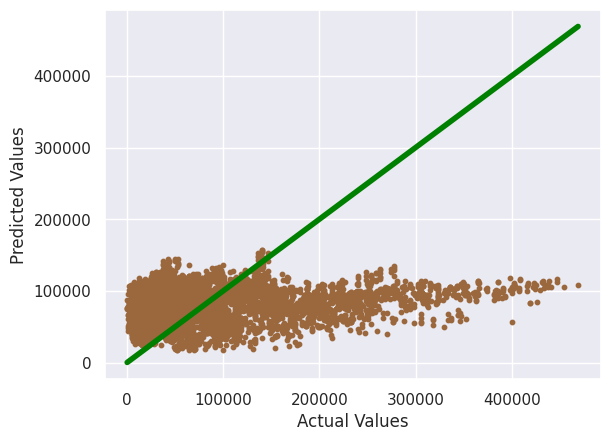

The accuracy of the Random Forest Model Train is 99.80
The accuracy of the  Random Forest Model Test is 98.56


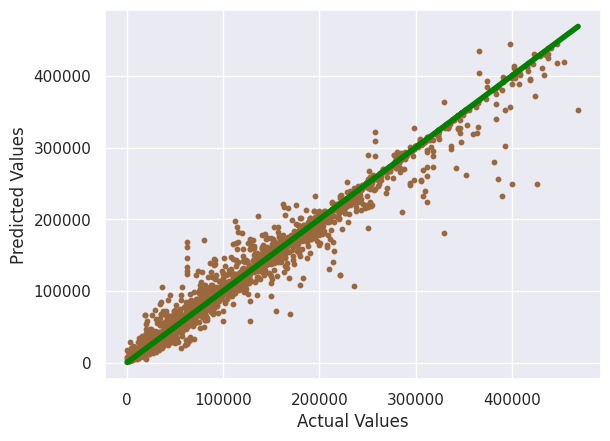

The accuracy of the Gradient Boost Model Train is 84.47
The accuracy of the  Gradient Boost Model Test is 83.11


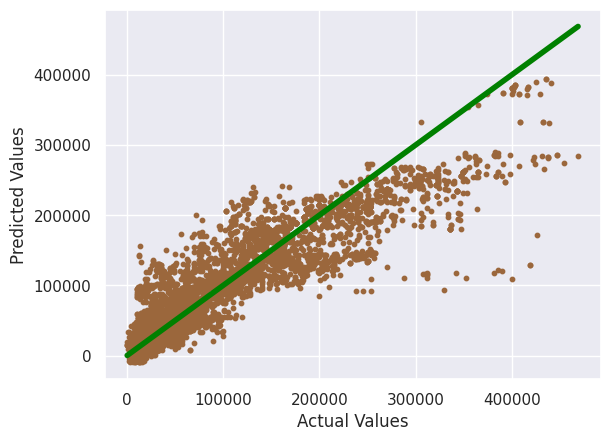

The accuracy of the XGBoost Model Train is 98.82
The accuracy of the  XGBoost Model Test is 97.43


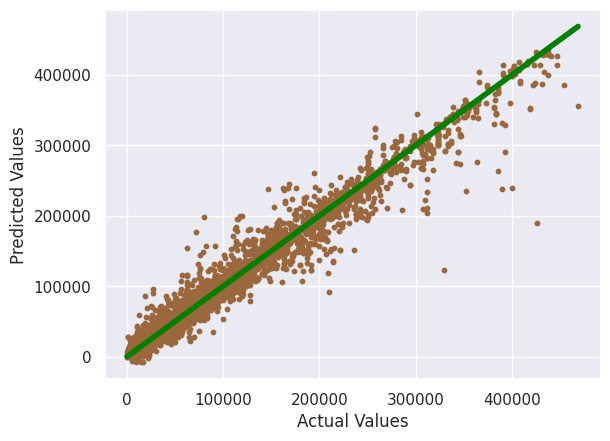

The accuracy of the KNN Model Train is 56.72
The accuracy of the  KNN Model Test is 28.82


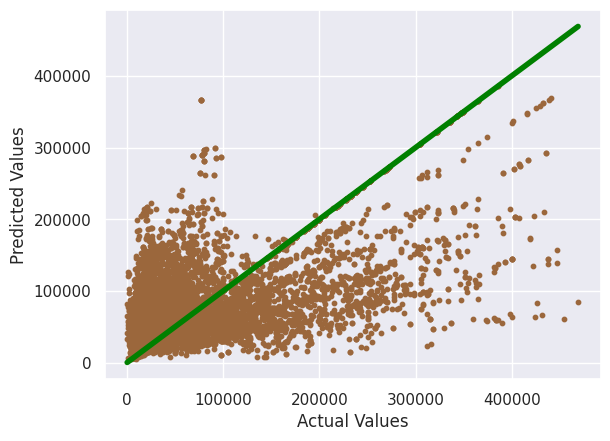

The accuracy of the Decision Tree Model Train is 100.00
The accuracy of the  Decision Tree Model Test is 97.62


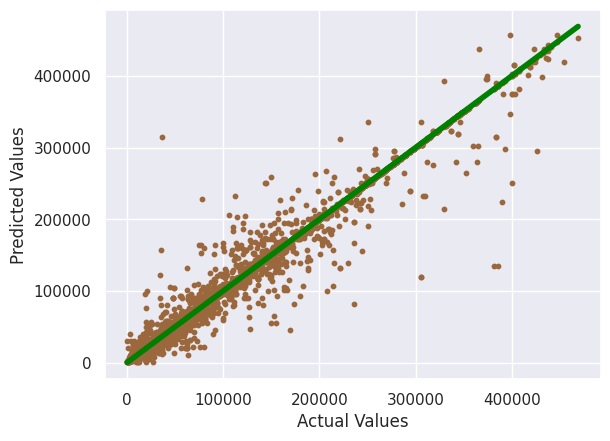

The accuracy of the Bagging Regressor Model Train is 99.81
The accuracy of the  Bagging Regressor Model Test is 98.59


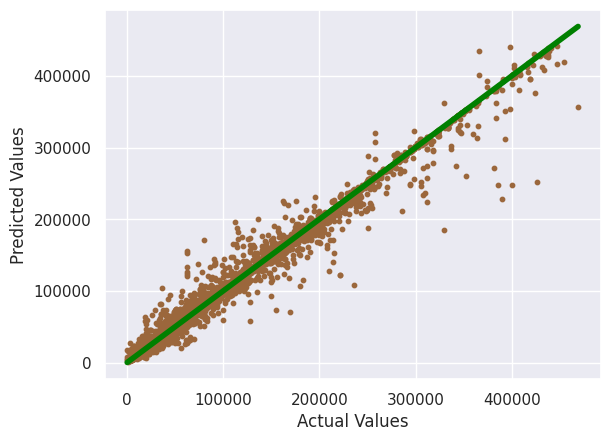

In [ ]:
results = []

models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('KNN',KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree',DecisionTreeRegressor(random_state=42)),
    ('Bagging Regressor',BaggingRegressor(n_estimators=150, random_state=42))
          ]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, R2_score))
    acc = (model.score(X_train , y_train)*100)
    print(f'The accuracy of the {name} Model Train is {acc:.2f}')
    acc =(model.score(X_test , y_test)*100)
    print(f'The accuracy of the  {name} Model Test is {acc:.2f}')
    plt.scatter(y_test, y_pred,s=10,color='#9B673C')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
#     plt.title(f' {name} Evaluation')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth = 4)
    plt.show()


# **Comparison Evaluation**

In [ ]:

dff = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'R2_score'])
df_styled_best = dff.style.highlight_max(subset=['Accuracy','R2_score'], color='green').highlight_min(subset=['MSE'], color='green').highlight_max(subset=['MSE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')

# df_styled_worst = dff.style.highlight_max(subset=['MSE'], color='red').highlight_min(subset=['Accuracy','R2_score'], color='red')

display(df_styled_best)
# display(df_styled_worst)

,Model,Accuracy,MSE,R2_score
0,Linear Regression,0.073724,6293718529.871188,0.073724
1,Random Forest,0.985628,97654323.573225,0.985628
2,Gradient Boost,0.831140,1147345777.258148,0.831140
3,XGBoost,0.974317,174504250.320092,0.974317
4,KNN,0.288206,4836388296.236208,0.288206
5,Decision Tree,0.976174,161890347.543726,0.976174
6,Bagging Regressor,0.985881,95933983.565644,0.985881
